In [48]:
import seaborn as sns

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



# Load the Titanic dataset

titanic_data = sns.load_dataset('titanic')



# Preview the first few rows

titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [49]:
print("Shape of the dataset:", titanic_data.shape)

print("\nColumns in the dataset:\n", titanic_data.columns)



# Check for missing values

print("\nMissing values in each column:\n", titanic_data.isnull().sum())



# Data types and summary statistics

print("\nData types:\n", titanic_data.dtypes)

print("\nSummary Statistics:\n", titanic_data.describe(include='all'))

Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Summary Statistics:
           su

In [50]:
print("\nMissing values in each column:\n", titanic_data.isnull().sum())

print("\nPercentage of missing values in each column:\n", (titanic_data.isnull().sum()/len(titanic_data))*100)


Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Percentage of missing values in each column:
 survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


Numerical columns for outlier detection: Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')


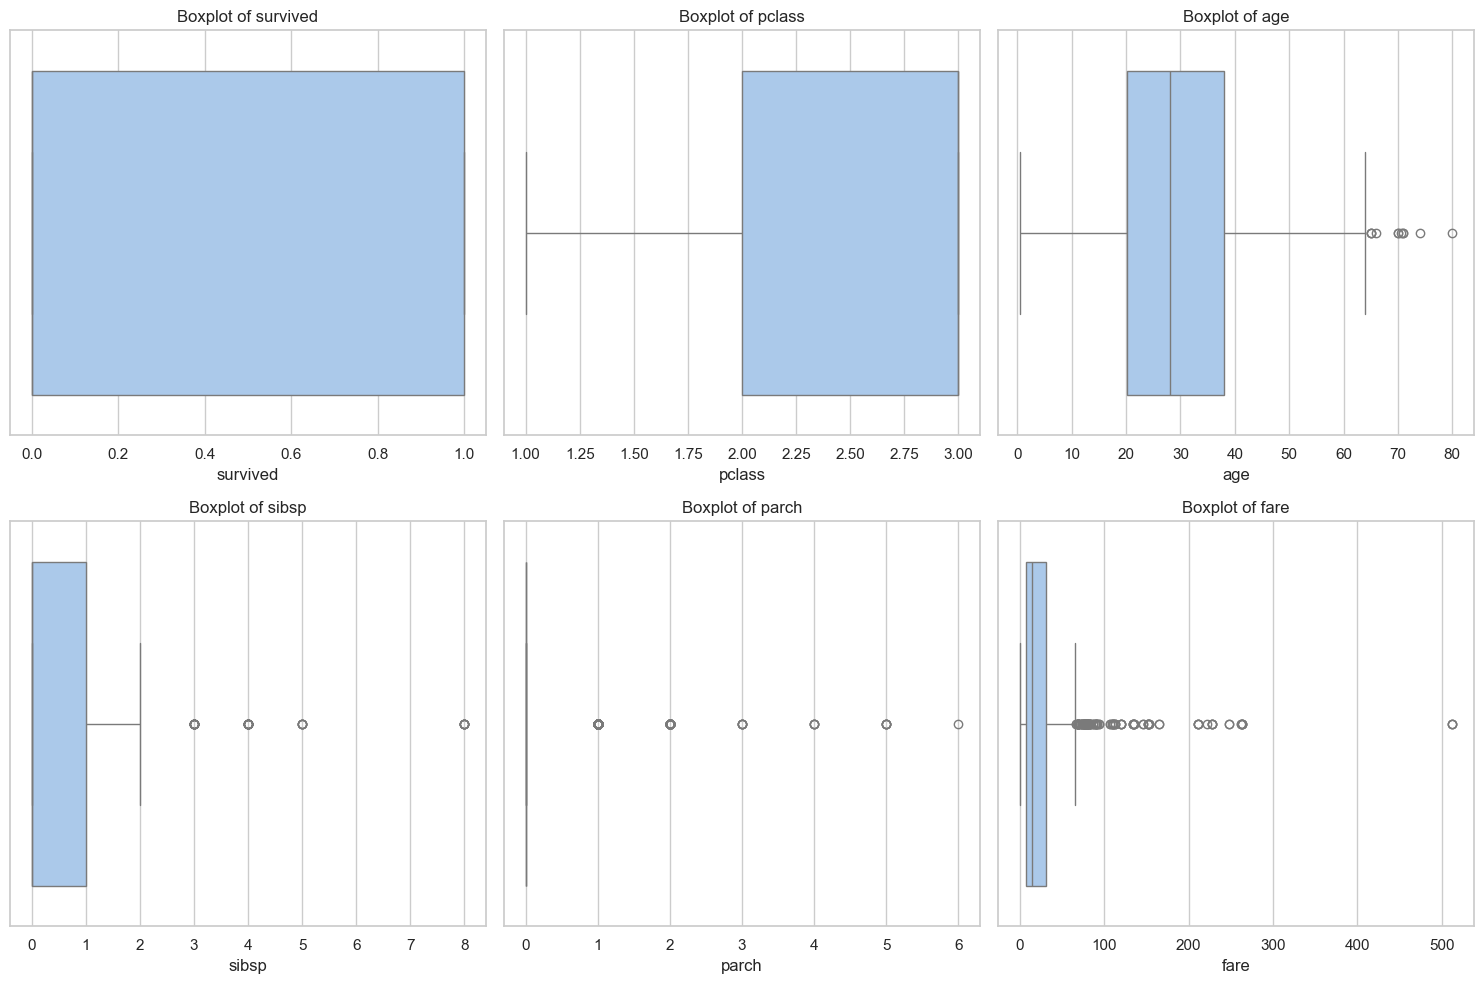

In [32]:
# Select only numerical columns for outlier detection
numeric_cols = titanic_data.select_dtypes(include=[np.number]).columns
print("Numerical columns for outlier detection:", numeric_cols)

# Plot boxplots for each numerical column to visually inspect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=titanic_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [34]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'{column} - Outliers detected: {outliers.shape[0]}')
    return outliers

# Apply to each numerical column
for col in numeric_cols:
    outliers = detect_outliers_iqr(titanic_data, col)


survived - Outliers detected: 0
pclass - Outliers detected: 0
age - Outliers detected: 11
sibsp - Outliers detected: 46
parch - Outliers detected: 213
fare - Outliers detected: 116


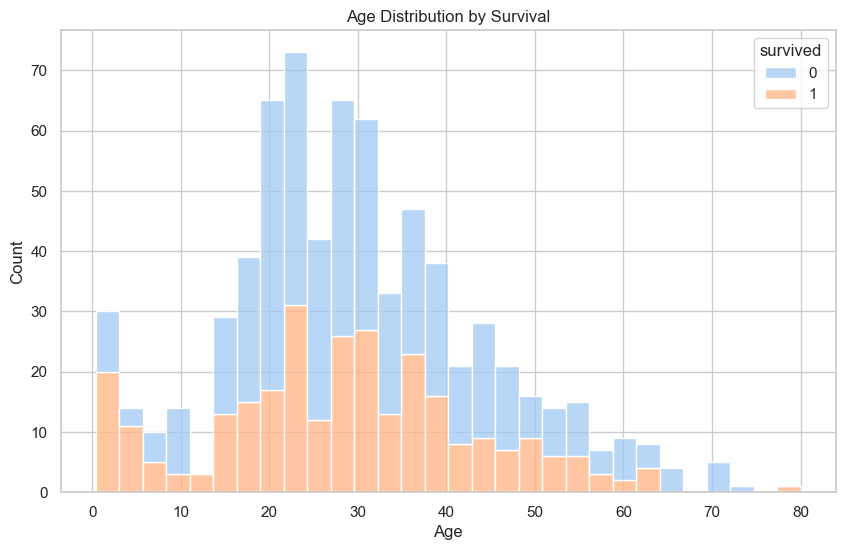

In [39]:
# Histogram of Age grouped by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='age', hue='survived', multiple='stack', bins=30)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


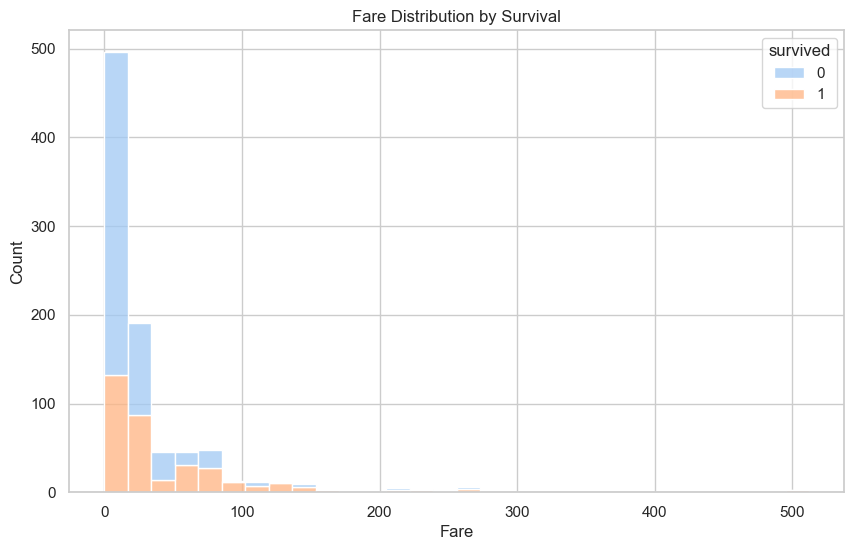

In [40]:
# Histogram of Fare grouped by Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='fare', hue='survived', multiple='stack', bins=30)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


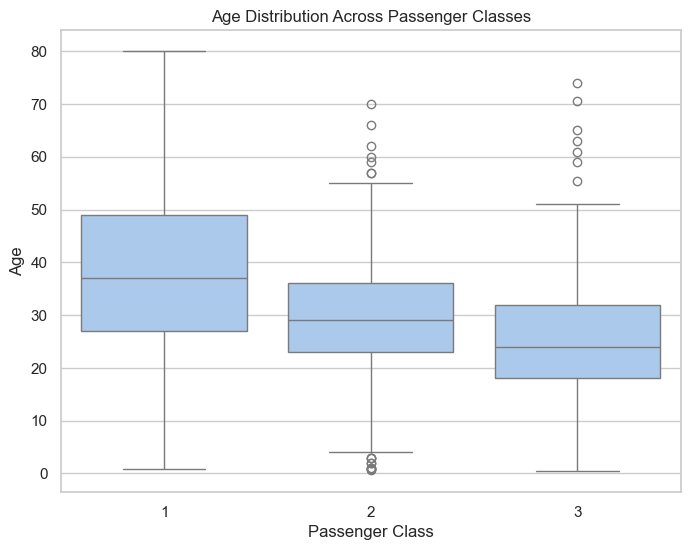

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='pclass', y='age', data=titanic_data)
plt.title('Age Distribution Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


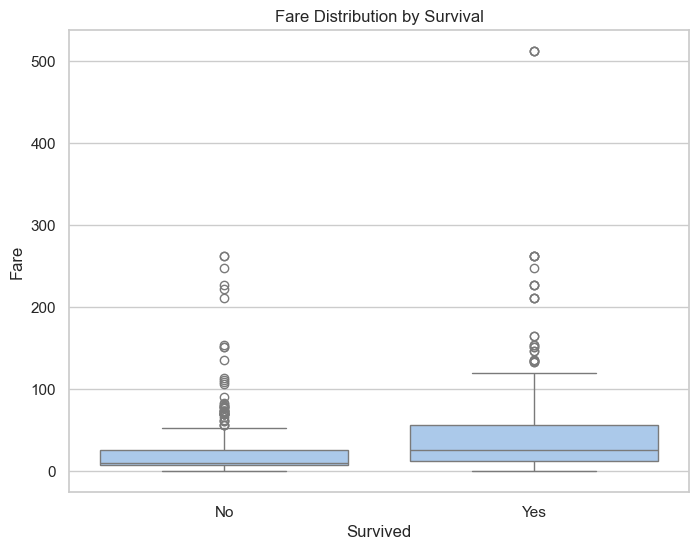

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='fare', data=titanic_data)
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


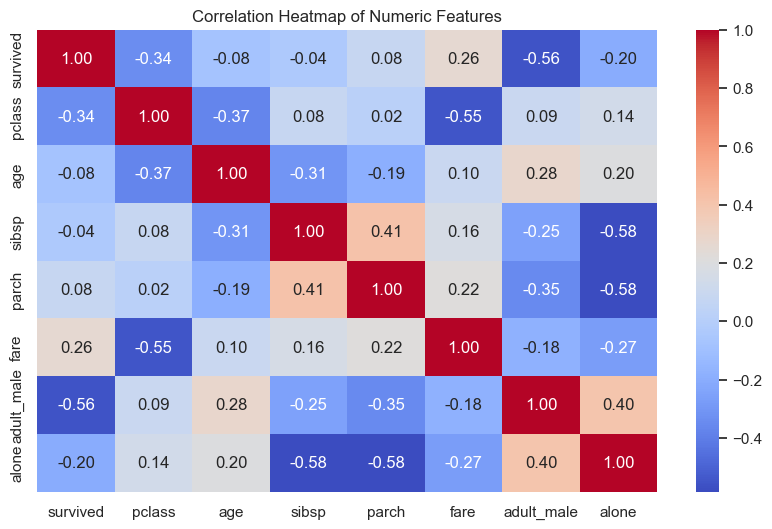

In [43]:
# Heatmap showing correlation between numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


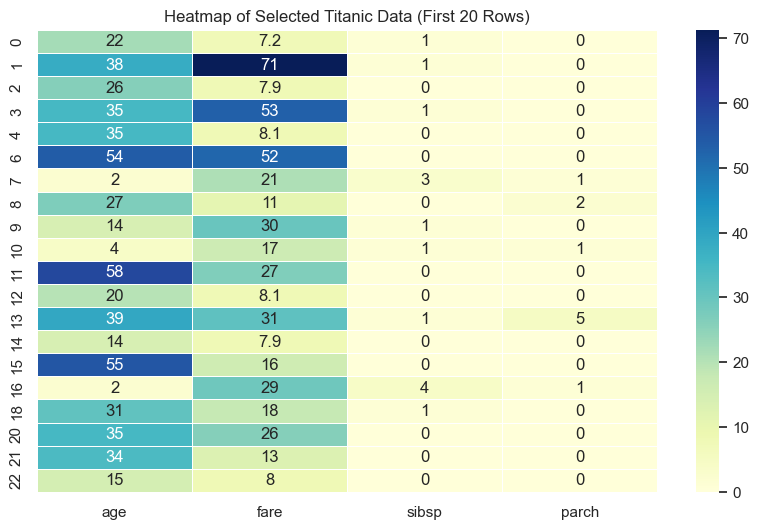

In [44]:
# Select a subset of numerical columns and drop NaNs for visualization
heatmap_data = titanic_data[['age', 'fare', 'sibsp', 'parch']].dropna().head(20)

# Create a heatmap of the actual data values
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap of Selected Titanic Data (First 20 Rows)')
plt.show()
